In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('Travel.csv')
df.head()
df.shape

(4888, 20)

In [6]:
# Handling missing values 
df.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [7]:
df['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [8]:
df['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [9]:
df['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [10]:
df['Gender'] = df['Gender'].replace('Fe Male','Female')
df['MaritalStatus'] = df['MaritalStatus'].replace('Single','Unmarried')

In [11]:
df.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [ ]:
features_with_nan = [features for features in df.columns if df[features].isnull().sum()>=1]

for feautre in features_with_nan:
    print(feautre,np.round(df[feautre].isnull().mean()*100,5))   ## This gives % age of missing values 

Age 4.62357
TypeofContact 0.51146
DurationOfPitch 5.13502
NumberOfFollowups 0.92062
PreferredPropertyStar 0.53191
NumberOfTrips 2.86416
NumberOfChildrenVisiting 1.35025
MonthlyIncome 4.76678


In [14]:
## Statistical or numerical columns 

df[features_with_nan].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


In [18]:
df.Age.fillna(df.Age.median(),inplace=True)

df.TypeofContact.fillna(df.TypeofContact.mode()[0],inplace=True)

df.DurationOfPitch.fillna(df.DurationOfPitch.median(),inplace=True)

df.NumberOfFollowups.fillna(df.NumberOfFollowups.mode()[0],inplace=True)

df.PreferredPropertyStar.fillna(df.PreferredPropertyStar.mode()[0],inplace=True)

df.NumberOfTrips.fillna(df.NumberOfTrips.median(),inplace=True)

df.NumberOfChildrenVisiting.fillna(df.NumberOfChildrenVisiting.mode()[0],inplace=True)

df.MonthlyIncome.fillna(df.MonthlyIncome.median(),inplace=True)

In [19]:
df.drop('CustomerID',inplace=True,axis=1)

KeyError: "['CustomerID'] not found in axis"

In [17]:
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [20]:
df.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Occupation                  0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [23]:
## Feature Engineering 

df['TotalVisiting'] = df['NumberOfPersonVisiting'] + df['NumberOfChildrenVisiting']
df.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'],axis=1)
df.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TotalVisiting
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,2.0


In [24]:
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
print('Number of numerical features is : ',len(numerical_features))

Number of numerical features is :  14


In [25]:
categorical_features = [feature for feature in df.columns if df[feature].dtype=='O']
print('Number of categorical features is : ',len(categorical_features))

Number of categorical features is :  6


In [27]:
discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<=25]
print('Number of discrete features is : ',len(discrete_features))

Number of discrete features is :  11


In [28]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
print('Number of continuous features is : ',len(continuous_features))

Number of continuous features is :  3


In [40]:
from sklearn.model_selection import train_test_split
X = df.drop(['ProdTaken'],axis=1)
y = df['ProdTaken']

In [41]:
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=42)
X_train.shape , X_test.shape

((3910, 19), (978, 19))

In [43]:
cat_features = X.select_dtypes(include='object').columns
num_features = X.select_dtypes(exclude='object').columns

from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()

oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features)
    ]
)

In [44]:
X_train = preprocessor.fit_transform(X_train)

In [45]:
X_test = preprocessor.transform(X_test)

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report , precision_score , confusion_matrix , recall_score , f1_score,roc_auc_score,roc_curve

In [53]:
models = {
    "Random Forest" : RandomForestClassifier(),
    "Decision Tree" : DecisionTreeClassifier()
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    
    
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    
    
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall  = recall_score(y_train,y_train_pred)
    model_train_rocauc_acore = roc_auc_score(y_train,y_train_pred)
    
    
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall  = recall_score(y_test,y_test_pred)
    model_test_rocauc_acore = roc_auc_score(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    
    
    print('Model Performance for Training Dataset : ')
    
    print('- Accuracy : {:.4f}' .format(model_train_accuracy))
    print('- F1 score : {:.4f}' .format(model_train_f1))
    print('- Precision : {:.4f}' .format(model_train_precision))
    print('- Recall score : {:.4f}' .format(model_train_recall))
    print('- ROC-AUC score : {:.4f}' .format(model_train_rocauc_acore))
    
    
    print('='*35)
    
    print('Model Performance for Testing Dataset : ')
    
    print('- Accuracy : {:.4f}' .format(model_test_accuracy))
    print('- F1 score : {:.4f}' .format(model_test_f1))
    print('- Precision : {:.4f}' .format(model_test_precision))
    print('- Recall score : {:.4f}' .format(model_test_recall))
    print('- ROC-AUC score : {:.4f}' .format(model_test_rocauc_acore))
    
    print('='*35)
    print('\n')
    
    
    

Random Forest
Model Performance for Training Dataset : 
- Accuracy : 1.0000
- F1 score : 1.0000
- Precision : 1.0000
- Recall score : 1.0000
- ROC-AUC score : 1.0000
Model Performance for Testing Dataset : 
- Accuracy : 0.9243
- F1 score : 0.9177
- Precision : 0.9756
- Recall score : 0.6283
- ROC-AUC score : 0.8122


Decision Tree
Model Performance for Training Dataset : 
- Accuracy : 1.0000
- F1 score : 1.0000
- Precision : 1.0000
- Recall score : 1.0000
- ROC-AUC score : 1.0000
Model Performance for Testing Dataset : 
- Accuracy : 0.9090
- F1 score : 0.9087
- Precision : 0.7713
- Recall score : 0.7592
- ROC-AUC score : 0.8523




In [54]:
rf_params = { 'max_depth' : [5,8,15,None,10],
             'max_features' : [5,7,'auto',8],
             'min_samples_split' : [2,8,15,20],
             'n_estimators' : [100,200,500,1000]
             }

In [58]:
randomcv_models = [
            ('RF',RandomForestClassifier(),rf_params),
            
]

In [60]:
from sklearn.model_selection import RandomizedSearchCV

model_params = {}

for name,model,params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,param_distributions=params,n_iter=100,cv=3,verbose=2,n_jobs=-1)
    random.fit(X_train,y_train)
    model_params[name] = random.best_params_
    
    
    
for model_name in model_params : 
    print(f'--------------------- Best Params for {model_name} ---------------------')
    print(model_params[model_name])    

Fitting 3 folds for each of 100 candidates, totalling 300 fits
--------------------- Best Params for RF ---------------------
{'n_estimators': 200, 'min_samples_split': 2, 'max_features': 8, 'max_depth': None}


In [65]:
models = {
    "Random Forest" : RandomForestClassifier(n_estimators=200,min_samples_split=2,max_features=8,max_depth=None)
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    
    
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    
    
    
    model_train_accuracy = accuracy_score(y_train,y_train_pred)
    model_train_f1 = f1_score(y_train,y_train_pred,average='weighted')
    model_train_precision = precision_score(y_train,y_train_pred)
    model_train_recall  = recall_score(y_train,y_train_pred)
    model_train_rocauc_acore = roc_auc_score(y_train,y_train_pred)
    
    
    model_test_accuracy = accuracy_score(y_test,y_test_pred)
    model_test_f1 = f1_score(y_test,y_test_pred,average='weighted')
    model_test_precision = precision_score(y_test,y_test_pred)
    model_test_recall  = recall_score(y_test,y_test_pred)
    model_test_rocauc_acore = roc_auc_score(y_test,y_test_pred)
    
    print(list(models.keys())[i])
    
    
    print('Model Performance for Training Dataset : ')
    
    print('- Accuracy : {:.4f}' .format(model_train_accuracy))
    print('- F1 score : {:.4f}' .format(model_train_f1))
    print('- Precision : {:.4f}' .format(model_train_precision))
    print('- Recall score : {:.4f}' .format(model_train_recall))
    print('- ROC-AUC score : {:.4f}' .format(model_train_rocauc_acore))
    
    
    print('='*35)
    
    print('Model Performance for Testing Dataset : ')
    
    print('- Accuracy : {:.4f}' .format(model_test_accuracy))
    print('- F1 score : {:.4f}' .format(model_test_f1))
    print('- Precision : {:.4f}' .format(model_test_precision))
    print('- Recall score : {:.4f}' .format(model_test_recall))
    print('- ROC-AUC score : {:.4f}' .format(model_test_rocauc_acore))
    
    print('='*35)
    print('\n')    
    

Random Forest
Model Performance for Training Dataset : 
- Accuracy : 1.0000
- F1 score : 1.0000
- Precision : 1.0000
- Recall score : 1.0000
- ROC-AUC score : 1.0000
Model Performance for Testing Dataset : 
- Accuracy : 0.9305
- F1 score : 0.9255
- Precision : 0.9624
- Recall score : 0.6702
- ROC-AUC score : 0.8319




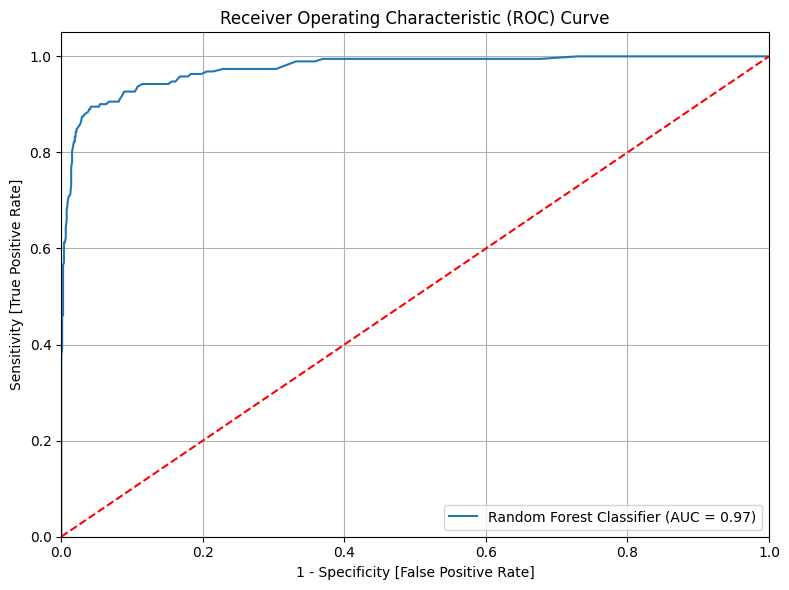

In [66]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Define model
auc_models = [
    {
        'label': 'Random Forest Classifier',
        'model': RandomForestClassifier(n_estimators=200, min_samples_split=2, max_features=8, max_depth=None),
    }
]

plt.figure(figsize=(8, 6))

# Loop through models
for algo in auc_models:
    model = algo['model']
    model.fit(X_train, y_train)
    
    # Get predicted probabilities
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label='%s (AUC = %0.2f)' % (algo['label'], auc_score))

# Plot base line
plt.plot([0, 1], [0, 1], 'r--')

# Chart settings
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity [False Positive Rate]')
plt.ylabel('Sensitivity [True Positive Rate]')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.savefig('auc.png')
plt.show()
